In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random
import os
import time
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline



## Visulalisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_csv('train_insurance.csv')

In [3]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.shape

(50882, 14)

In [6]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

### Identify Types of Variable and number of variables for each type

In [7]:
continous = [var for var in df.columns if df[var].dtype != 'O']

In [8]:
discrete = [var for var in df.columns if df[var].dtype!='O' and var!='Response' and df[var].nunique()<10]


In [9]:
for var in df.columns:
    print(var, df[var].unique()[0:20], '\n')

ID [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

City_Code ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29'] 

Region_Code [3213 1117 3732 4378 2190 1785  679 3175 3497  530  600 1097 3453  900
 1911 1484 1090  677 1634  973] 

Accomodation_Type ['Rented' 'Owned'] 

Reco_Insurance_Type ['Individual' 'Joint'] 

Upper_Age [36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40] 

Lower_Age [36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25] 

Is_Spouse ['No' 'Yes'] 

Health Indicator ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9'] 

Holding_Policy_Duration ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0'] 

Holding_Policy_Type [ 3. nan  1.  4.  2.] 

Reco_Policy_Cat [22 19 16 17  1 18 21 13 20  9  2  4 12  6 14 11  3  8  7 10] 

Reco_Policy_Premium [11628.  30510.   7450.  17780.  10404.  15264.  10640.  29344.  27283.2
 21100.8  4068.  

In [10]:
categorical = [var for var in df.columns if df[var].dtype == 'O']

In [11]:
categorical

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

In [12]:
continous

['ID',
 'Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

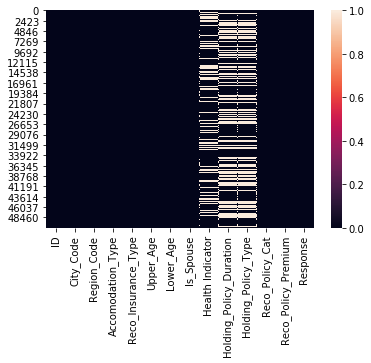

In [13]:
import seaborn as sns
sns.heatmap(df.isnull())

In [14]:
df.isnull().mean()

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

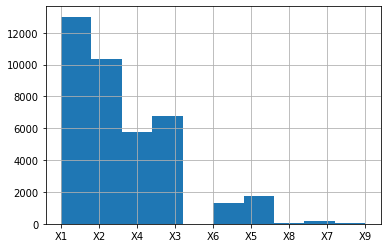

In [15]:
df['Health Indicator'].hist()

In [16]:
df.loc[df['Health Indicator'].isnull()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1
19,20,C20,973,Owned,Individual,27,27,No,NaN,NaN,NaN,4,8050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,50860,C1,217,Owned,Individual,70,70,No,NaN,6.0,3.0,20,19448.0,0
50865,50866,C21,4915,Owned,Individual,74,74,No,NaN,NaN,NaN,14,19944.0,0
50869,50870,C11,1770,Rented,Individual,45,45,No,NaN,1.0,1.0,20,10944.0,0
50871,50872,C10,224,Rented,Individual,21,21,No,NaN,1.0,1.0,13,11840.0,0


In [17]:
for var in df.columns:
    print(var , df[var].nunique())

ID 50882
City_Code 36
Region_Code 5316
Accomodation_Type 2
Reco_Insurance_Type 2
Upper_Age 58
Lower_Age 60
Is_Spouse 2
Health Indicator 9
Holding_Policy_Duration 15
Holding_Policy_Type 4
Reco_Policy_Cat 22
Reco_Policy_Premium 6977
Response 2


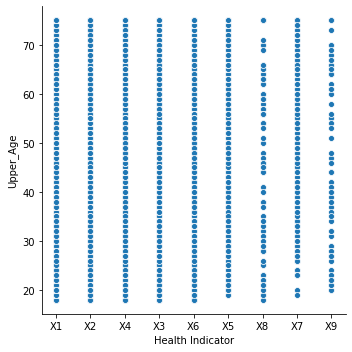

In [18]:
sns.relplot(data=df, x="Health Indicator", y="Upper_Age")


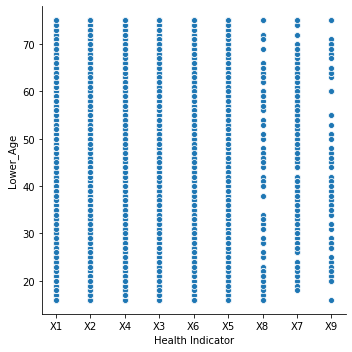

In [19]:
sns.relplot(data=df, x="Health Indicator", y="Lower_Age")

In [20]:
#sns.displot(data=df, x="Lower_Age", hue="Health Indicator")
def plot_seg_cat(cat_var):
    order = df[cat_var].value_counts(ascending=True).index
    sns.barplot(x=cat_var, y='Upper_Age', data=df)
    plt.show()

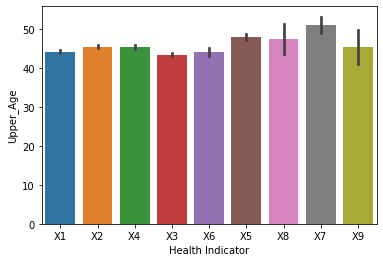

In [21]:
plot_seg_cat('Health Indicator')


In [22]:
df.groupby(df['Holding_Policy_Duration'])

In [23]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['14+'],'15')

In [24]:
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'])

In [25]:
df['Holding_Policy_Duration'].unique()

array([15., nan,  1.,  3.,  5.,  9., 14.,  7.,  2., 11., 10.,  8.,  6.,
        4., 13., 12.])

In [26]:
pd.crosstab(df.Reco_Policy_Cat, df.Holding_Policy_Type)

Holding_Policy_Type,1.0,2.0,3.0,4.0
Reco_Policy_Cat,,,,
1,510,248,347,91
2,600,136,270,72
3,53,39,437,116
4,111,90,308,81
5,73,55,422,80
6,82,60,281,56
7,77,56,310,72
8,78,43,295,50
9,74,58,300,43


In [27]:
df.groupby(df['Health Indicator']).count()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Health Indicator,,,,,,,,,,,,,
X1,13010,13010,13010,13010,13010,13010,13010,13010,7682,7682,13010,13010,13010
X2,10332,10332,10332,10332,10332,10332,10332,10332,6252,6252,10332,10332,10332
X3,6762,6762,6762,6762,6762,6762,6762,6762,3912,3912,6762,6762,6762
X4,5743,5743,5743,5743,5743,5743,5743,5743,3638,3638,5743,5743,5743
X5,1727,1727,1727,1727,1727,1727,1727,1727,1141,1141,1727,1727,1727
X6,1280,1280,1280,1280,1280,1280,1280,1280,700,700,1280,1280,1280
X7,196,196,196,196,196,196,196,196,133,133,196,196,196
X8,78,78,78,78,78,78,78,78,54,54,78,78,78
X9,63,63,63,63,63,63,63,63,36,36,63,63,63


In [28]:
df.isnull().mean()

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

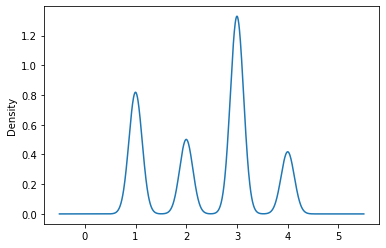

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Holding_Policy_Type'].plot(kind='kde', ax=ax)

In [30]:
def impute_na_edi(df, variable, value):

    return df[variable].fillna(value)

In [31]:
np.floor(df.Holding_Policy_Type.mean() + 3 * df.Holding_Policy_Type.std())

5.0

In [32]:
df['Holding_Policy_Type_EDI'] = impute_na_edi(df, 'Holding_Policy_Type',
                                   np.floor(df.Holding_Policy_Type.mean() + 3 * df.Holding_Policy_Type.std()))

In [33]:
print('Original variable variance: ', df['Holding_Policy_Type'].var())
print('Variance after EDI imputation: ', df['Holding_Policy_Type_EDI'].var())

Original variable variance:  1.0525179025599183
Variance after EDI imputation:  2.204801461145161


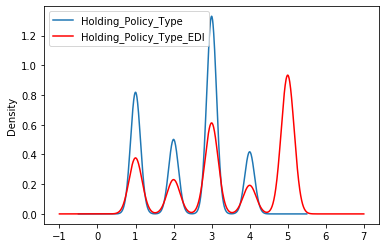

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Holding_Policy_Type'].plot(kind='kde', ax=ax)

# imputed variable
df['Holding_Policy_Type_EDI'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
df.isnull().mean()

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
Holding_Policy_Type_EDI    0.000000
dtype: float64

In [36]:
df.Holding_Policy_Duration.dtype

dtype('float64')

In [37]:
df['Holding_Policy_Duration_EDI'] = impute_na_edi(df, 'Holding_Policy_Duration',
                                   np.floor(df.Holding_Policy_Duration.mean() + 3 * df.Holding_Policy_Duration.std()))

In [38]:
print('Original variable variance: ', df['Holding_Policy_Duration'].var())
print('Variance after EDI imputation: ', df['Holding_Policy_Duration_EDI'].var())

Original variable variance:  22.646464051209264
Variance after EDI imputation:  59.548873206172786


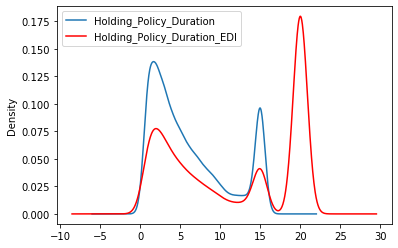

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Holding_Policy_Duration'].plot(kind='kde', ax=ax)

# imputed variable
df['Holding_Policy_Duration_EDI'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5, 0, 'Health Indicator')

Text(0, 0.5, 'Number of polices')

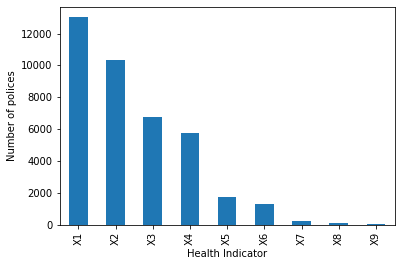

In [40]:
df['Health Indicator'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Health Indicator')
plt.ylabel('Number of polices')

In [41]:
df['Health Indicator'].fillna('Missing', inplace=True)

Text(0.5, 0, 'Health Indicator')

Text(0, 0.5, 'Number of polices')

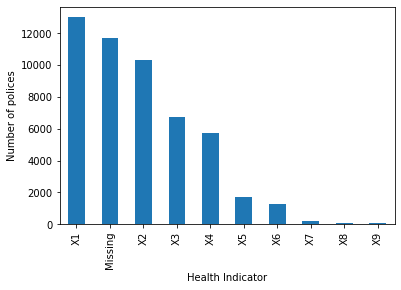

In [42]:
df['Health Indicator'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Health Indicator')
plt.ylabel('Number of polices')

Text(0.5, 1.0, 'Relationship between Health Indicator and Response')

Text(0, 0.5, 'Response')

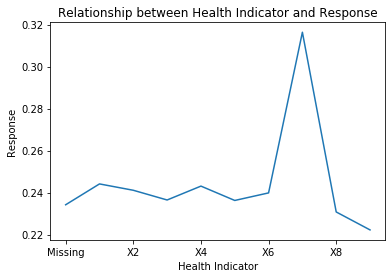

In [43]:
for var in ['Health Indicator']:
    
    fig = plt.figure()
    fig = df.groupby([var])['Response'].mean().plot()
    fig.set_title('Relationship between {} and Response'.format(var))
    fig.set_ylabel('Response')
    plt.show()

In [44]:
from sklearn.preprocessing import OneHotEncoder

tmp = pd.get_dummies(df[['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration_EDI']], drop_first=True)


In [45]:
df.isnull().mean()

ID                             0.000000
City_Code                      0.000000
Region_Code                    0.000000
Accomodation_Type              0.000000
Reco_Insurance_Type            0.000000
Upper_Age                      0.000000
Lower_Age                      0.000000
Is_Spouse                      0.000000
Health Indicator               0.000000
Holding_Policy_Duration        0.397999
Holding_Policy_Type            0.397999
Reco_Policy_Cat                0.000000
Reco_Policy_Premium            0.000000
Response                       0.000000
Holding_Policy_Type_EDI        0.000000
Holding_Policy_Duration_EDI    0.000000
dtype: float64

In [46]:
df = df.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type'], axis=1)

In [47]:
df = pd.concat([df, tmp], axis=1)


In [48]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_EDI,Holding_Policy_Duration_EDI,Holding_Policy_Duration_EDI,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,C3,3213,Rented,Individual,36,36,No,X1,22,11628.0,0,3.0,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,22,30510.0,0,5.0,20.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,C5,3732,Owned,Individual,32,32,No,Missing,19,7450.0,1,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C24,4378,Owned,Joint,52,48,No,X1,19,17780.0,0,3.0,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,16,10404.0,0,1.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [49]:
df = df.drop(['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration_EDI'], axis=1)

In [50]:
df.head()

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_EDI,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,3213,36,36,22,11628.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1117,75,22,22,30510.0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,3732,32,32,19,7450.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4378,52,48,19,17780.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2190,44,44,16,10404.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn import *

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Response', axis=1),  # predictors
    df['Response'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((45793, 53), (5089, 53))

In [53]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test) ## y_pred=Vector of Predictions
print('y_pred=',y_pred)

y_pred= [0 0 0 ... 0 0 0]


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:',cm)

Confusion Matrix: [[3801    0]
 [1288    0]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3801
           1       0.00      0.00      0.00      1288

    accuracy                           0.75      5089
   macro avg       0.37      0.50      0.43      5089
weighted avg       0.56      0.75      0.64      5089



In [57]:
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [58]:
#pip3 install catboost

In [59]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, pyll
import time
import colorama  # https://pypi.python.org/pypi/colorama
import pickle
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier, Pool

In [60]:
params = { 
    'metric': 'auc',
    'n_estimators': 10000
}

In [61]:
clf = lgb.LGBMClassifier(**params)


In [62]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=-1)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.67354


LGBMClassifier(metric='auc', n_estimators=10000)

In [63]:
ypred_lgb = clf.predict_proba(X_test)[:,1]


In [64]:
roc_auc_score(y_test, ypred_lgb)

0.6735399600628145

CatBootClassifier

In [66]:

params = {
    'eval_metric': 'AUC',
    'random_seed': 0,
    'n_estimators': 10000,
}

In [67]:
bst = CatBoostClassifier(**params, early_stopping_rounds=300)
_ = bst.fit(X_train, y_train, eval_set=(X_test,y_test), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [68]:
ypred_cat = bst.predict_proba(X_test)[:,1]


In [69]:
roc_auc_score(y_test, ypred_cat)


0.6680781128209151

In [70]:
f_importance_df = pd.DataFrame(bst.get_feature_importance(), columns=['importance'], index=X_test.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

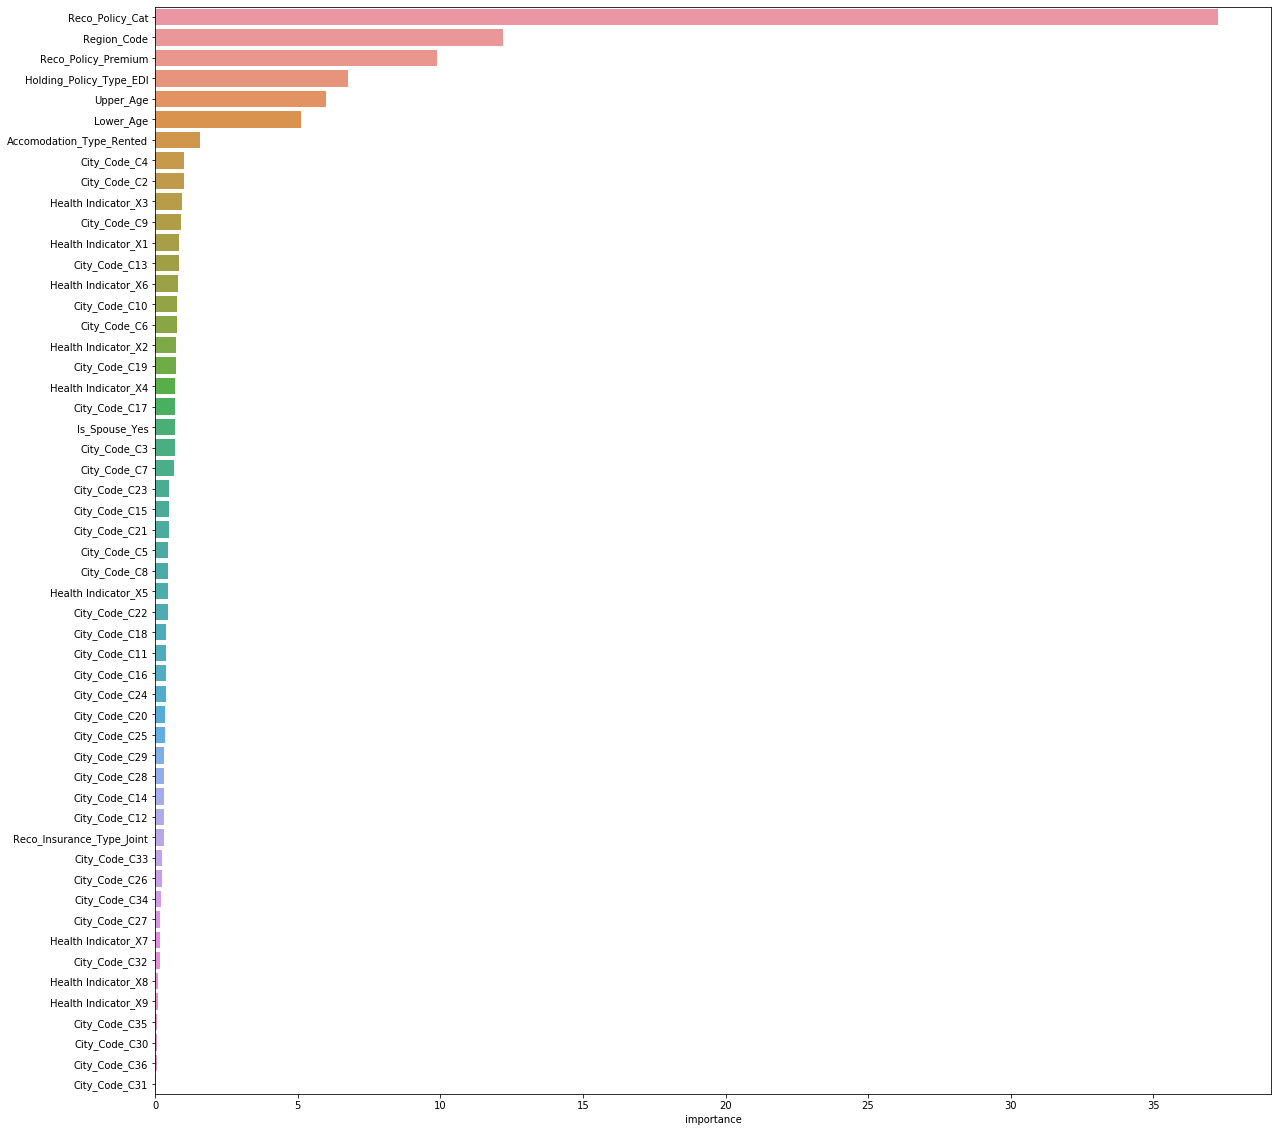

In [73]:
plt.figure(figsize=(20,20))
sns.barplot(x=f_importance_df.importance[:500], y=f_importance_df.index[:500]);